# Machine Learning: Prática 01

Nessa prática iremos abordar como implementar um classificador que minimiza o Erro Quadrático Médio (em inglês, Mean Squared Error, MSE) de predições, no dataset Pap-Smear do Herlev Hospital, estudado por [1].

O dataset pode ser baixado [neste link](http://mde-lab.aegean.gr/index.php/downloads)

In [ ]:
import shutil
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.utils.validation import check_X_y
from sklearn.utils.validation import check_array
from sklearn.utils.multiclass import unique_labels
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split

## Etapa 1: Conhecendo seus dados

In [ ]:
url = "http://mde-lab.aegean.gr/images/stories/docs/smear2005.zip"
filename = "data.zip"

In [ ]:
with urllib.request.urlopen(url) as response, open(filename, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

In [ ]:
!unzip -qq data.zip

In [ ]:
df = pd.read_excel('./smear2005/new_database_results.xls')

In [ ]:
df.describe()

,Kerne_A,Cyto_A,K/C,Kerne_Ycol,Cyto_Ycol,KerneShort,KerneLong,KerneElong,KerneRund,CytoShort,CytoLong,CytoElong,CytoRund,KernePeri,CytoPeri,KernePos,KerneMax,KerneMin,CytoMax,CytoMin,Class
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,2990.826881,14053.904444,0.356610,90.490139,139.356935,52.497274,71.193455,0.750395,0.705578,118.130049,171.596531,0.691923,0.381297,201.161396,490.032579,0.274383,107.895311,86.651036,416.865867,423.703381,4.577972
std,1878.177267,20357.674179,0.213364,21.780290,25.012857,18.754784,23.242059,0.156531,0.154648,71.904552,90.183748,0.177367,0.172679,67.798197,274.857442,0.165056,57.507109,54.833614,633.817458,621.690605,1.816252
min,316.875000,467.875000,0.003990,17.913947,69.889702,13.973914,19.416488,0.307806,0.270610,29.457850,44.643029,0.210975,0.066993,60.750000,136.125000,0.003364,19.000000,13.000000,14.000000,21.000000,1.000000
25%,1599.750000,2329.000000,0.218484,76.017591,123.257682,38.929320,55.713553,0.642667,0.598836,67.732383,104.235311,0.567724,0.251712,154.250000,287.375000,0.149395,67.000000,49.000000,71.000000,85.000000,3.000000
50%,2592.250000,4891.250000,0.354828,89.201813,138.402393,50.404684,71.175839,0.762162,0.716932,93.126177,142.579802,0.696390,0.350568,199.500000,388.125000,0.242546,96.000000,74.000000,140.000000,155.000000,5.000000
75%,3976.000000,14019.875000,0.504971,103.399375,151.040909,64.771793,86.353923,0.859482,0.813543,144.291619,215.058132,0.807432,0.495136,243.375000,608.750000,0.364968,134.000000,109.000000,398.000000,421.000000,6.000000
max,10794.625000,127313.750000,0.885497,174.994651,230.486399,112.723053,158.823802,1.192308,1.135615,418.494540,571.909084,1.215871,1.071126,411.375000,1718.000000,0.903233,430.000000,432.000000,3906.000000,4000.000000,7.000000


In [ ]:
df_bin = df.copy()

mask = df_bin.Class <= 3
column_name = 'Class'
df_bin.loc[mask, column_name] = 0

mask = df_bin.Class > 0
column_name = 'Class'
df_bin.loc[mask, column_name] = 1

In [ ]:
df_bin.Class.describe()

count    917.000000
mean       0.736096
std        0.440988
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

## Etapa 2: Programando o Classificador

Durante esse curso, iremos usar as convenções da biblioteca Scikit-Learn, que é uma das mais utilizadas no contexto de __Machine Learning__. Detalhes sobre as convenções usadas podem ser encontradas [__neste link__](https://scikit-learn.org/stable/developers/develop.html) (em inglês).

### Recap

Iremos implementar um __estimador__. Esse nome vem da estatística, onde procuramos estimar uma quantidade (nesse caso, um vetor de parâmetros). Para tanto, precisamos implementar a função __fit__, que irá encontrar o vetor de parâmetros ótimo para a função

$$\hat{y} = f(\mathbf{x};\theta,b) = \theta_{1}\mathbf{x}_{1} + \cdots + \theta_{n}\mathbf{x}_{n} + b$$

Lembre-se, dado um dataset $D = \{\mathbf{x}_{i}, y_{i}\}_{i=1}^{N}$, criamos uma matriz $\mathbf{X} \in \mathbb{R}^{N\times n}$ e um vetor $\mathbf{y}$. Dessa forma, procuramos encontrar $\theta \in \mathbb{R}^{n}$ e $b \in \mathbb{R}$ tais que,

$$(\theta^{\star}, b^{\star}) = \underset{\theta, b}{\text{argmin}}\, MSE(\hat{\mathbf{y}}, \mathbf{y}) = \underset{\theta, b}{\text{argmin}}\,\dfrac{1}{N}\sum_{i=1}^{N}(y_{i}-\hat{y}_{i})^{2}$$

Conforme discutido anteriormente, temos,

$$\theta^{\star} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$$
$$b^{\star} = \mu_{y} - \theta^{T}\mu_{\mathbf{x}}$$

em que $\mu$ é a média de uma dada variável, ou seja,

$$\mu_{y} = \dfrac{1}{N}\sum_{i=1}^{N}y_{i} = \dfrac{1}{N}\mathbf{y}^{T}\mathbf{1}_{N}$$

### Programando o estimador

In [ ]:
class MSEClassifier(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        # Check if X and y have compatible shape
        X, y = check_X_y(X, y)
        # Store classes seen during training
        self.classes_ = unique_labels(y)

        # -----------------------
        # | Your code goes here |
        # | Implement the expr  |
        # | for θ and b using   |
        # | numpy               |
        # -----------------------
        # self.θ = ...
        # self.b = ...
        
        self.θ = np.linalg.inv(X.T @ X) @ X.T @ y

        N = y.shape[0]
        
        # ux = (1/N) * (X.T @ np.ones(shape=(N,)))
        ux = np.mean(X, axis=0)

        # uy = (1/N) * (y.T @ np.ones(shape=(N,)))
        uy = np.mean(y)

        self.b = uy - self.θ.T @ ux

    def predict(self, X):
        # Check if X has correct shape
        X = check_array(X)

        # Check if fit fn has been called
        check_is_fitted(self)

        # -----------------------
        # | Your code goes here |
        # | Implement the expr  |
        # | for θ and b using   |
        # | numpy               |
        # -----------------------
        # NOTE: your prediction should be
        # either 0 or 1 (binary)
        # you can do it by using 1 * (val > 0)
        # so that in each place val > 0 you get 1
        # and 0 otherwise.
        # yhat = ...

        yhat = X @ self.θ + self.b
        yhat = np.vectorize(lambda x: 1 if x >= 0 else 0)(yhat)

        return yhat

## Etapa 3: Treinando o modelo

Nessa etapa nós iremos treinar o model. Para tanto, precisamos fazer o seguinte,

### 3.1. Instanciar corretamente o modelo previamente programado.

In [ ]:
model = MSEClassifier()

### 3.2. Criar matrizes de dados (X, y)

In [ ]:
data = df_bin.values

# X = data[:, Que colunaS correspondem às features?]
# y = data[:, Que coluna corresponde aos labels?]

X = data[:, 1:-1]
y = data[:, -1]

X = X.astype('float')
y = y.astype('float')

### 3.3. Dividir os dados em treino e teste

Como o número de amostras à nossa disposição é limitado, precisamos separar os dados em um conjunto de __treino__ e um conjunto de __testes__. Isso tem por motivo verificar o comportamento do modelo num conjunto de dados estatisticamente independente do conjunto de treino. Essa etapa está relacionada ao conceito de [generalização](https://en.wikipedia.org/wiki/Generalization_error) em Machine Leanring, que será abordado em aulas futuras.

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.4. Chamar a função .fit

In [ ]:
model.fit(Xtr, ytr)

### 3.5. Predição

In [ ]:
yhat = model.predict(Xts)

## Etapa 4: Avaliação do modelo

Na função abaixo, você irá programar uma métrica chamada __acurácia__, definida através da seguinte formula,

$$acc(\hat{\mathbf{y}}, \mathbf{y}) = \dfrac{1}{N}\sum_{i=1}^{N}I[\hat{y}_{i} = y_{i}]$$

ou seja, é o número de predições corretas, dividido pelo número de amostras $(N)$.

### Implementando a função de acurácia

In [ ]:
def my_accuracy_score(yhat, y):
  success = 0
  for i in range(len(y)):
    if yhat[i] == y[i]:
      success += 1
  acc = success / len(y)
  return acc

### Calculando a acurácia

In [ ]:
acc = my_accuracy_score(yhat, yts)

print('Acurácia do classificador: {}'.format(acc))

Acurácia do classificador: 0.8315217391304348


## Etapa 5: Avaliando o modelo

### 5.1. Explorando $\theta$

__Perguntas__

1. Todas as variáveis tem igual peso na classificação?
2. Qual a relação entre a magnitude de $\theta_{i}$ e a magnitude de $\mathbf{x}_{i}$?

Respostas

1. Não, as variáveis possuem magnitudes muito distintas e por isso algumas são mais relevantes para o valor final de yhat.
2. Quando não há normalização das variáveis $\mathbf{x}$, é esperado que a magnitude da variável $\theta_{i}$ correspondente sofra alguma compensação de acordo com a magnitude de $\mathbf{x}_{i}$, de forma inversamente proporcional.

In [ ]:
θ = model.θ

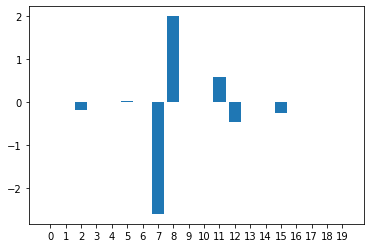

In [ ]:
plt.bar(np.arange(len(θ)), θ)
plt.xticks(np.arange(len(θ)));

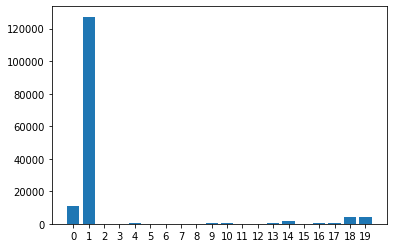

In [ ]:
plt.bar(np.arange(len(θ)), np.max(X, axis=0))
plt.xticks(np.arange(len(θ)));

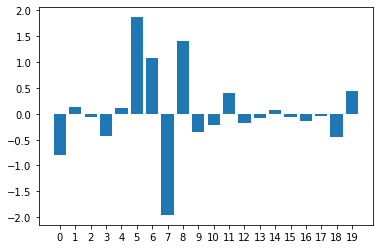

In [ ]:
# média das relevâncias( x_i * θ_i ) de cada variável para o valor de yhat

plt.bar(np.arange(len(θ)), θ*np.mean(X, axis=0))
plt.xticks(np.arange(len(θ)));

### Explorando $\mathbf{X}^{T}\mathbf{X}$

__Perguntas__

1. Se $\mathbf{X} \in \mathbb{R}^{N \times n}$, que formato tem a matriz $\mathbf{X}^{T}\mathbf{X}$?
2. Seja $\mathbf{T} = \mathbf{X}^{T}\mathbf{X}$. Você consegue expressar $\mathbf{T}_{ij}$ em termos das amostras $\mathbf{x}_{k}$? __Dica:__ escreva $\mathbf{Z} = \mathbf{X}^{T}$ e pense na expressão do produto entre matrizes

__Respostas__

1. $\mathbf{X}^{T}\mathbf{X} \in \mathbb{R}^{n \times n}$
2. $\mathbf{T}_{ij} = \mathbf{X}_{0i}\mathbf{X}_{0j} + \mathbf{X}_{1i}\mathbf{X}_{1j} + \mathbf{X}_{2i}\mathbf{X}_{2j} + ... + \mathbf{X}_{Ni}\mathbf{X}_{Nj} = \sum_{k=0}^{N} \mathbf{X}_{ki}\mathbf{X}_{kj}$

In [ ]:
T = np.dot(X.T, X)
T_inv = np.linalg.inv(T)

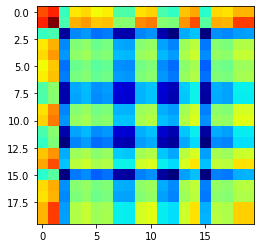

In [ ]:
plt.imshow(np.log(T), cmap='jet')

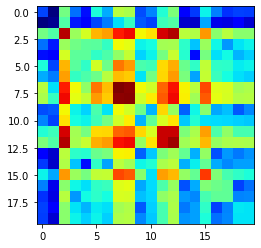

In [ ]:
plt.imshow(np.log(abs(T_inv)), cmap='jet')

## Referências

[1] Marinakis, Y., Dounias, G., & Jantzen, J. (2009). Pap smear diagnosis using a hybrid intelligent scheme focusing on genetic algorithm based feature selection and nearest neighbor classification. Computers in Biology and Medicine, 39(1), 69-78.